<a href="https://colab.research.google.com/github/janputra/Neural-Networks-Practice/blob/main/TF2_0_Spam_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-10-04 07:29:40--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   694KB/s    in 0.7s    

2020-10-04 07:29:41 (694 KB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df= pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df= df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.columns=['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
y= df['b_labels'].values

In [ ]:
#split up the data

x_train, x_test, y_train,y_test= train_test_split(df['data'],y,test_size=0.25)

In [ ]:
max_vocab = 20000
tokenizer= Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
word2idx= tokenizer.word_index
V=len(word2idx)
print('Found %s unique tokens.' %V)

Found 7599 unique tokens.


In [ ]:
data_train= pad_sequences(sequence_train)

print('shape of train data :', data_train.shape)

shape of train data : (4179, 189)


In [ ]:
T= data_train.shape[1]
T

189

In [ ]:
data_test= pad_sequences(sequence_test,maxlen=T)
print('shape of test data :', data_test.shape)

shape of test data : (1393, 189)


In [ ]:
# Model
# Embedding dimensional 
D=20

i=Input(shape=(T,))
x= Embedding(V+1,D)(i)
x= Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x= Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x= Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 189, 20)           152000    
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 18, 128)          

In [ ]:
data_train

array([[   0,    0,    0, ...,   34, 2458,  126],
       [   0,    0,    0, ...,  710,  635,  413],
       [   0,    0,    0, ..., 3665,   99,  320],
       ...,
       [   0,    0,    0, ...,    2,  362,  272],
       [   0,    0,    0, ...,   26,  664,  380],
       [   0,    0,    0, ..., 7599,  146,   97]], dtype=int32)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
r= model.fit(data_train, y_train, validation_data=(data_test,y_test),epochs=5)

Epoch 1/5
131/131 [==============================] - 2s 17ms/step - loss: 0.3596 - accuracy: 0.8751 - val_loss: 0.3009 - val_accuracy: 0.8385
Epoch 2/5
131/131 [==============================] - 2s 15ms/step - loss: 0.1060 - accuracy: 0.9569 - val_loss: 0.0778 - val_accuracy: 0.9813
Epoch 3/5
131/131 [==============================] - 2s 16ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0622 - val_accuracy: 0.9856
Epoch 4/5
131/131 [==============================] - 2s 16ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0698 - val_accuracy: 0.9828
Epoch 5/5
131/131 [==============================] - 2s 16ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0700 - val_accuracy: 0.9856


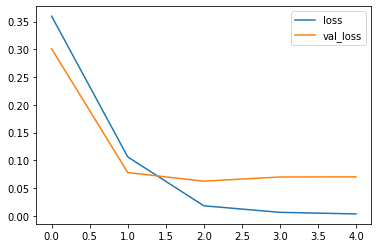

In [ ]:
hist= r.history
import matplotlib.pyplot as plt
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

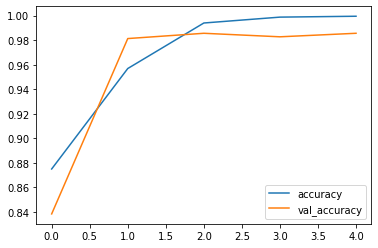

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
# label mapping
labels = '''ham
spam'''.split()

In [ ]:
p_test=model.predict(data_test).argmax(axis=1)

In [ ]:
temp=x_test.values

In [ ]:
misclassified_idx= np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_idx)
print(temp[i])
print('True label : %s Predicted : %s' % (labels[y_test[i]],labels[p_test[i]]))

Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access!
True label : spam Predicted : ham


Confusion matrix, without normalization
[[1168    0]
 [ 225    0]]


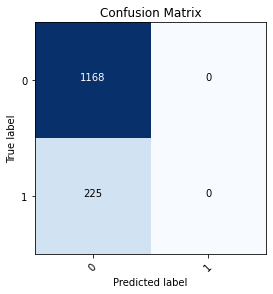

In [ ]:
#confussion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):


  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)


  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks= np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'

  thresh = cm.max()/2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
               horizontalalignment='center',
               color='white' if cm[i,j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()


p_test=model.predict(data_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm,list(range(2)))